In [33]:
import ipynb
import matplotlib.pyplot as plt
from ipynb.fs.defs.functions_and_classes import *
import random
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import StandardScaler

In [34]:
#model = 'word2vec'
model = 'glove'
#model = 'fasttext'
dim = 300
#language = 'he'
language = 'en'
#suffix_pair = ['ity', 'ness']
suffix_pair = ['al', 'less']
suff1, suff2 = suffix_pair

In [35]:
fname = f'{model}_{dim}_{language}_vectors_reduced.txt'
embedding = build_dict_from_vector_file('./models/reduced/', fname)
if language == 'he':
    path_to_dataset = './datasets/he/definitive_dataset.csv'
if language == 'en':
    path_to_dataset = f'./datasets/en/{suff1}_{suff2}_dataset_filtered.csv'
dataset = load_dataset_from_csv(language, path_to_dataset)
dataset.filter_against_embedding(embedding)
triplets = dataset.get_triplets()

Processed 0
Embedding entries: 176
Embedding dimension: 96
Number of datapoints before adjustment: 205
Number of datapoints after adjustment: 59


In [36]:
def reduce_2d(vecs, algorithm):
    if algorithm == 'pca':
        model = PCA(n_components=2)
        model.fit(vecs)
        print(f'Explained variance: {np.sum(model.explained_variance_ratio_)}')
        print(f'Explained variance per component: {(model.explained_variance_ratio_)}')
    if algorithm == 'kernel-pca':
        model = KernelPCA(n_components=2, kernel='cosine')
        model.fit(vecs)
    return model

def suffix_effect_2d(embedding, base_affixed_pairs, sample_size, n_runs, algorithm):
    for _ in range(n_runs):
        pairs_sample = random.sample(base_affixed_pairs, sample_size)
        base_sample = [p[0] for p in pairs_sample]
        affixed_sample = [p[1] for p in pairs_sample]
        base_vecs = [embedding[a] for a in base_sample]
        affixed_vecs = [embedding[n] for n in affixed_sample]
        model = reduce_2d(base_vecs+affixed_vecs, algorithm)
        base_vecs_reduced = model.transform(base_vecs)
        affixed_vecs_reduced = model.transform(affixed_vecs)
        plt.figure(figsize=(5,3.5))
        for i, (base, affixed) in enumerate(pairs_sample):
            base_vec = base_vecs[i]
            affixed_vec = affixed_vecs[i]
            plt.scatter([base_vec[0], affixed_vec[0]], [base_vec[1], affixed_vec[1]])
            plt.plot([base_vec[0], affixed_vec[0]], [base_vec[1], affixed_vec[1]], linestyle='dashed', color='grey')
            plt.annotate(base, (base_vec[0], base_vec[1]))
            plt.annotate(affixed, (affixed_vec[0], affixed_vec[1]))
        plt.show()

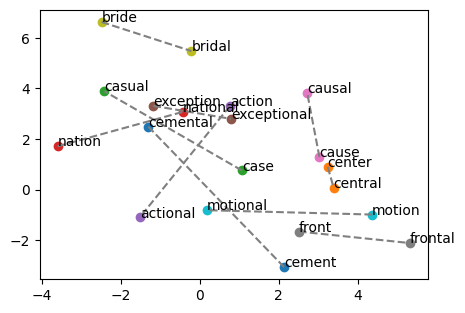

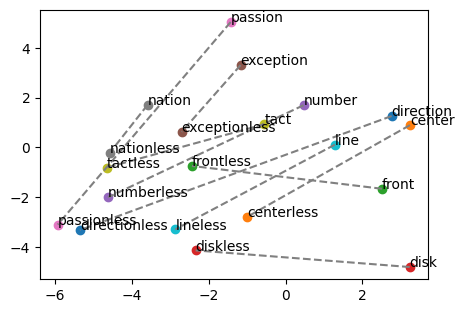

In [37]:
suffix_effect_2d(embedding, [[t[0], t[1]] for t in triplets], 10, 1, 'kernel-pca')
suffix_effect_2d(embedding, [[t[0], t[2]] for t in triplets], 10, 1, 'kernel-pca')

In [31]:
def compute_affixal_vecs(embedding, triplets):
    suff_1_vecs = []
    suff_2_vecs = []
    for t in triplets:
        suff1_vec = embedding[t[1]]-embedding[t[0]]
        suff2_vec = embedding[t[2]]-embedding[t[0]]
        suff_1_vecs.append(suff1_vec)
        suff_2_vecs.append(suff2_vec)
    return suff_1_vecs, suff_2_vecs

def suffix_clusters(embedding, triplets, algorithm):
    suff1_vecs, suff2_vecs = compute_affixal_vecs(embedding, triplets)
    model = reduce_2d(suff1_vecs+suff2_vecs, algorithm)
    suff1_vecs_reduced = model.transform(suff1_vecs)
    suff2_vecs_reduced = model.transform(suff2_vecs)
    plt.figure(figsize=(5,3.5))
    plt.scatter([v[0] for v in suff1_vecs], [v[1] for v in suff1_vecs], label=suff1)
    plt.scatter([v[0] for v in suff2_vecs], [v[1] for v in suff2_vecs], label=suff2)
    plt.legend()
    plt.show()

Explained variance: 0.08075216126018464
Explained variance per component: [0.04177437 0.03897779]


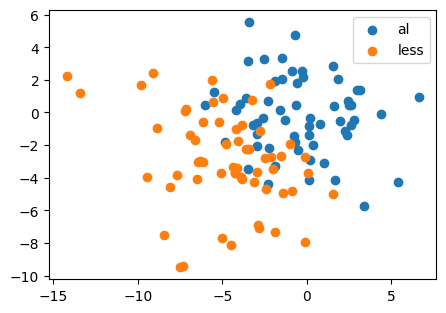

In [32]:
suffix_clusters(embedding, triplets, 'pca')